<a href="https://colab.research.google.com/github/wahid028/CryptoCurrency-Price-prediction_Kaggle/blob/main/LSTM_g_research_crypto_forecasting_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#install kaggle
!pip install -q kaggle

In [9]:
#upload the kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"learn2know","key":"ef7c1f3683ce0590f0cee38b88d74d21"}'}

In [10]:
#create a kaggle directory
!mkdir ~/.kaggle

In [11]:
#copy the kaggle.json to kaggle directory
!cp kaggle.json ~/.kaggle/

In [12]:
#permission for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [13]:
#list all the available dataset in kaggle
!kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39           9937       1344  0.9375           
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           2042         72  1.0              
mdmahmudulhasansuzan/students-adaptability-level-in-online-education  Students Adaptability Level in Online Education    6KB  2022-04-16 04:46:28           6618        168  1.0              
muratkokludataset/acoustic-extinguisher-fire-

## **Get g-research-crypto-forecasting dataset**

In [14]:
!kaggle competitions download -c g-research-crypto-forecasting

 99% 1.13G/1.13G [00:10<00:00, 103MB/s] 
100% 1.13G/1.13G [00:10<00:00, 118MB/s]


In [15]:
#unzip the target file
!unzip g-research-crypto-forecasting.zip

Archive:  g-research-crypto-forecasting.zip
  inflating: asset_details.csv       
  inflating: example_sample_submission.csv  
  inflating: example_test.csv        
  inflating: gresearch_crypto/__init__.py  
  inflating: gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so  
  inflating: supplemental_train.csv  
  inflating: train.csv               


## **LSTM prediction**

In [17]:
# from matplotlib.finance import candlestick2_ohlc
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [18]:
# load dataset
train = pd.read_csv("../content/train.csv")
asset_details = pd.read_csv("../content/asset_details.csv")
df_test = pd.read_csv("../content/example_test.csv")
mapping = dict(asset_details[['Asset_ID', 'Asset_Name']].values)
train["Asset name"] = train["Asset_ID"].map(mapping)

In [19]:
df_train = train
df_asset_details = asset_details

In [20]:
asset_details.sort_values(by=['Weight'], inplace=True, ascending=False)

In [21]:
temp = train.reset_index(drop = True) 
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

In [22]:
##########TRANSACTIONS##########
temp['Year'] = temp['TIME'].dt.year
temp.columns =[column.replace(" ", "_") for column in temp.columns]
temp.dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]
volume_yr = temp.groupby(['Year','Asset_name'])['Volume'].max().reset_index()
volume_yr = volume_yr.query("Year == 2021")

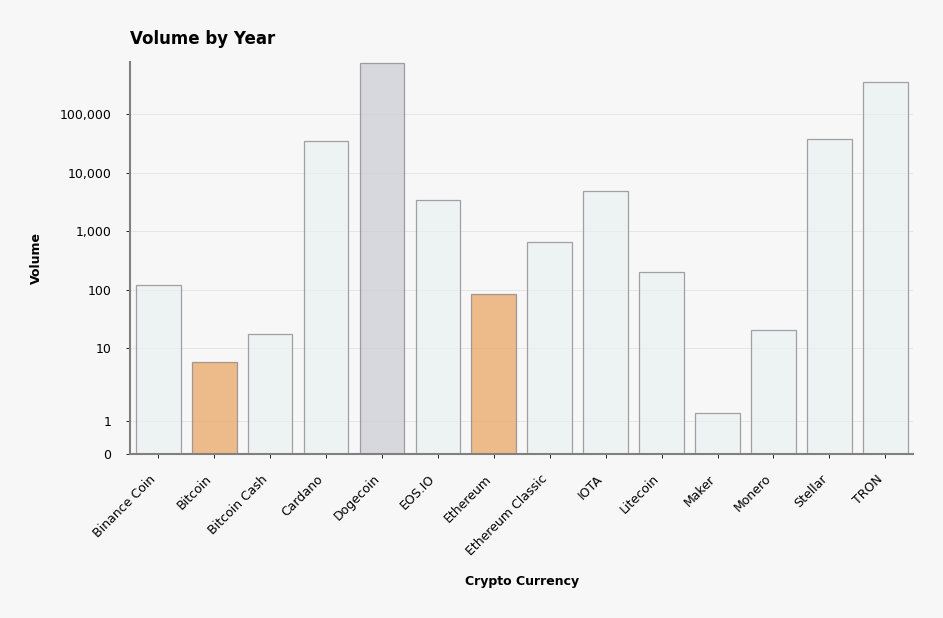

In [23]:
plt.rcParams['figure.dpi'] = 300
fig = plt.figure(figsize=(3, 5), facecolor='#F7F7F7')
gs = fig.add_gridspec(2, 1)
gs.update(wspace=1.5, hspace=1.1)

background_color = "#F7F7F7"
color_map = ["#E8F0F2" for _ in range(20)]
color_map[4] = "#C9CCD5" #F2A154 79B4B7
color_map[1] = "#F2A154"
color_map[6] = "#F2A154"
sns.set_palette(sns.color_palette(color_map))

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_facecolor(background_color)

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

for s in ['bottom','left']:
  ax0.spines[s].set_linewidth(0.5)
  ax0.spines[s].set_color('grey')
    
#graph
ax0 = sns.barplot(ax=ax0, y=volume_yr['Volume']/1000, x=volume_yr['Asset_name'], 
                      zorder=2, linewidth=0.3, edgecolor="#7F7C82", 
                      orient='v', saturation=0.9, alpha=0.7)
ax0.grid(which='major', axis='y', zorder=0, color='#CDD0CB', linewidth=0.2, alpha=0.5)
ax0.set_yscale('symlog')

#format axis
ax0.set_ylabel("Volume",fontsize=3, weight='semibold')
ax0.set_xlabel("Crypto Currency",fontsize=3, weight='semibold')
ax0.tick_params(labelsize=3, width=0.2, length=1)
plt.setp( ax0.xaxis.get_majorticklabels(), rotation=45, ha="right" )

#title
x0, x1 = ax0.get_xlim()
y0, y1 = ax0.get_ylim()
ax0.text(x0, y1+2000000, 'Volume by Year', fontsize=4, ha='left', va='top', weight='semibold')

y_format = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
ax0.yaxis.set_major_formatter(y_format)

plt.show()

**Bitcoin Performance**

In [26]:
#Extract Bitcoin data
temp = train.query("Asset_ID == 1").reset_index(drop = True) # bitcoin
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')

all_data = temp.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data=all_data.reset_index()
all_data=all_data.set_index('TIME')

In [27]:
start = dt.datetime.strptime('2018-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close', 'VWAP', 'Volume']]

**Relative Strength Index (RSI)**

In [28]:
#RSI
all_data['Diff'] = all_data.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data['Up'] = all_data['Diff']
all_data.loc[(all_data['Up']<0), 'Up'] = 0

all_data['Down'] = all_data['Diff']
all_data.loc[(all_data['Down']>0), 'Down'] = 0 
all_data['Down'] = abs(all_data['Down'])

all_data['avg_5up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data['avg_5down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data['avg_15up'] = all_data.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data['avg_15down'] = all_data.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data['RS_5'] = all_data['avg_5up'] / all_data['avg_5down']
all_data['RS_15'] = all_data['avg_15up'] / all_data['avg_15down']

all_data['RSI_5'] = 100 - (100/(1+all_data['RS_5']))
all_data['RSI_15'] = 100 - (100/(1+all_data['RS_15']))

all_data['RSI_ratio'] = all_data['RSI_5']/all_data['RSI_15']

In [29]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data = all_data.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
# apd = mpf.make_addplot(selected_data['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
# mpf.plot(selected_data, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5,15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          addplot=apd, # RSI
#          style='yahoo',  # choose the yahoo style
#          title='Bitcoin Daily (RSI)' # title
#          )

**Ethereum Performance**

In [30]:
#Extract Ethereum data
temp1 = train.query("Asset_ID == 6").reset_index(drop = True) # Etherium
temp1['TIME'] = pd.to_datetime(temp1['timestamp'], unit='s')

all_data1 = temp1.groupby(['Asset_ID', 'Asset name']).resample('D', on='TIME', origin='start').agg(
    {"Open": "first", 
     "Close": "last", 
     "Low": "min", 
     "High": "max",
     "Volume": "last",
     "VWAP": "max"
    }
).dropna()[['Open', 'High', 'Low', 'Close', 'Volume','VWAP']]

all_data1=all_data1.reset_index()
all_data1=all_data1.set_index('TIME')

In [31]:
#RSI
all_data1['Diff'] = all_data1.groupby('Asset_ID')['Close'].transform(lambda x: x.diff())
all_data1['Up'] = all_data1['Diff']
all_data1.loc[(all_data1['Up']<0), 'Up'] = 0

all_data1['Down'] = all_data1['Diff']
all_data1.loc[(all_data1['Down']>0), 'Down'] = 0 
all_data1['Down'] = abs(all_data1['Down'])

all_data1['avg_5up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=5).mean())
all_data1['avg_5down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=5).mean())

all_data1['avg_15up'] = all_data1.groupby('Asset_ID')['Up'].transform(lambda x: x.rolling(window=15).mean())
all_data1['avg_15down'] = all_data1.groupby('Asset_ID')['Down'].transform(lambda x: x.rolling(window=15).mean())

all_data1['RS_5'] = all_data1['avg_5up'] / all_data1['avg_5down']
all_data1['RS_15'] = all_data1['avg_15up'] / all_data1['avg_15down']

all_data1['RSI_5'] = 100 - (100/(1+all_data1['RS_5']))
all_data1['RSI_15'] = 100 - (100/(1+all_data1['RS_15']))

all_data1['RSI_ratio'] = all_data1['RSI_5']/all_data1['RSI_15']

In [32]:
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
selected_data1 = all_data1.loc[start:end,['Open','High','Low','Close','RSI_15', 'VWAP', 'Volume']]
# apd = mpf.make_addplot(selected_data1['RSI_15'],panel=2,color='lime',ylim=(10,90),secondary_y=True)
# mpf.plot(selected_data1, # the dataframe containing the OHLC (Open, High, Low and Close) data
#          type='candle', # use candlesticks 
#          volume=True, # also show the volume
#          mav=(5,15), # use two different moving averages
#          figratio=(3,1), # set the ratio of the figure
#          addplot=apd, # RSI
#          style='yahoo',  # choose the yahoo style
#          title='Ethereum Daily' # title
#          )

**LSTM Prediction**

In [33]:
#Bitcoin LSTM prediction
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import math
plt.style.use('fivethirtyeight')

In [34]:
#Split the data
data = selected_data.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)

# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data itno x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [35]:
#Build the LSTM Model
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data = scaled_data[training_data_len - 60: , :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# convert data to numpy array
x_test = np.array(x_test)

# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean square error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )

150/150 [==============================] - 7s 27ms/step - loss: 0.0298


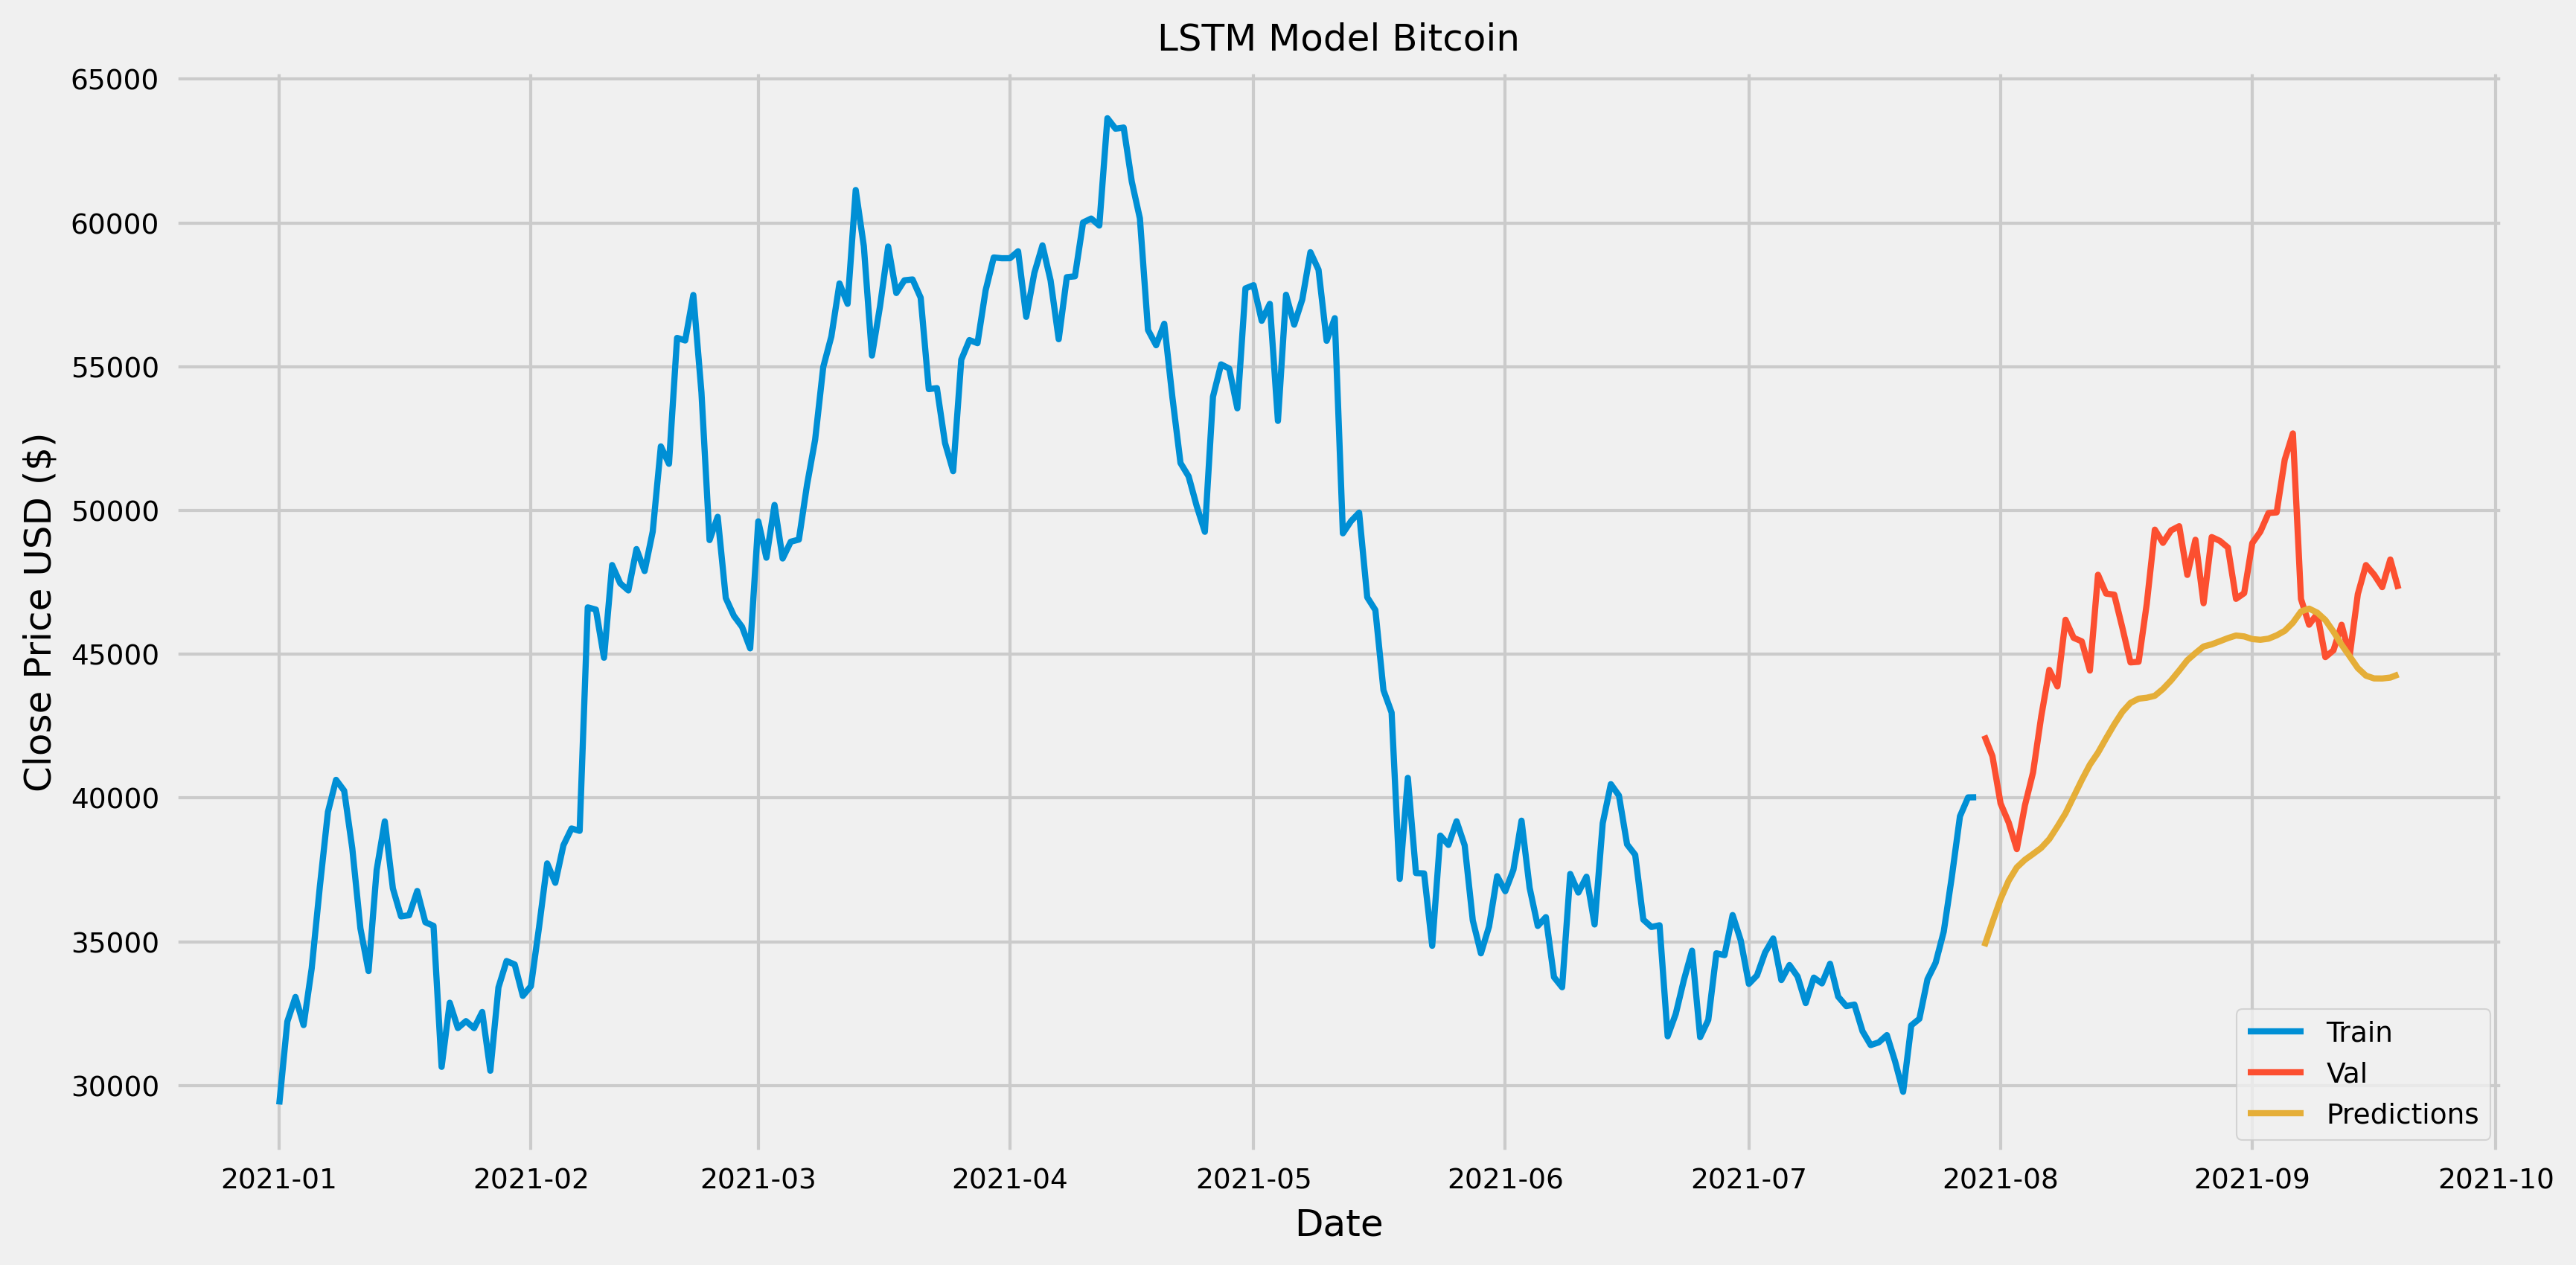

In [37]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('LSTM Model Bitcoin', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train['Close'], linewidth=2.0)
plt.plot(valid[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

**Prediction vs Actual Price**

We see from the chart above, price direction prediction whether the price will be up or down. Next, let's check the accuracy of LSTM prediction. We can check the actual price directly from Yahoo!

In [38]:
import pandas_datareader as web
# Get the quote
btc_quote = web.DataReader('BTC-USD', data_source='yahoo', start='2018-01-01', end='2021-09-20')
# Create a new dataframe
new_df = btc_quote.filter(['Close'])
# Get the last 60 days closing price
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# convert to numpy array
X_test = np.array(X_test)
# Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)[0]
btc_quote2 = web.DataReader('BTC-USD', data_source='yahoo', start='2021-09-20', end='2021-09-20')
actual_price = btc_quote2['Close'][0]
actual_price
accuracy = ((pred_price-actual_price)/actual_price)*100
print('Prediction close price at 9-20-2021: $', pred_price, sep='')
print('Actual price at 9-20-2021: $', actual_price, sep='')
print('Accuracy: ', accuracy, '%', sep='')

RemoteDataError: ignored

In [39]:
#Ethereum LSTM prediction
data1 = selected_data1.filter(['Close'])
dataset1 = data1.values
training_data_len1 = math.ceil(len(dataset1) * .8)
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data1 = scaler.fit_transform(dataset1)
# Create the training data set
# Create the scaled training data set
train_data1 = scaled_data1[0:training_data_len1, :]

# Split the data itno x_train and y_train data sets
x_train1 = []
y_train1 = []

for i in range(60, len(train_data1)):
    x_train1.append(train_data1[i-60:i,0])
    y_train1.append(train_data1[i,0])
    
# Convert the x_train and y_train to numpy arrays
x_train1, y_train1 = np.array(x_train1), np.array(y_train1)
# Reshape the data
x_train1 = np.reshape(x_train1, (x_train1.shape[0], x_train1.shape[1], 1))
# x_train.shape

# Build the LSTM Model
model1 = Sequential()
model1.add(LSTM(50, return_sequences=True, input_shape=(x_train1.shape[1], 1)))
model1.add(LSTM(50, return_sequences=False))
model1.add(Dense(25))
model1.add(Dense(1))

In [40]:
# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(x_train1, y_train1, batch_size=1, epochs=1)

150/150 [==============================] - 7s 25ms/step - loss: 0.0190


In [41]:
# Create the testing data set
# Create new array containing scaled values from index 1028 to 1359
test_data1 = scaled_data1[training_data_len1 - 60: , :]

# Create the data sets x_test and y_test
x_test1 = []
y_test1 = dataset1[training_data_len1: , :]
for i in range(60, len(test_data1)):
    x_test1.append(test_data1[i-60:i, 0])
    
# convert data to numpy array
x_test1 = np.array(x_test1)

# reshape the data
x_test1 = np.reshape(x_test1, (x_test1.shape[0], x_test1.shape[1], 1))

# Get the models predicted price values
predictions1 = model1.predict(x_test1)
predictions1 = scaler.inverse_transform(predictions1)

# Get the root mean square error (RMSE)
rmse1 = np.sqrt( np.mean( predictions1 - y_test1 )**2 )

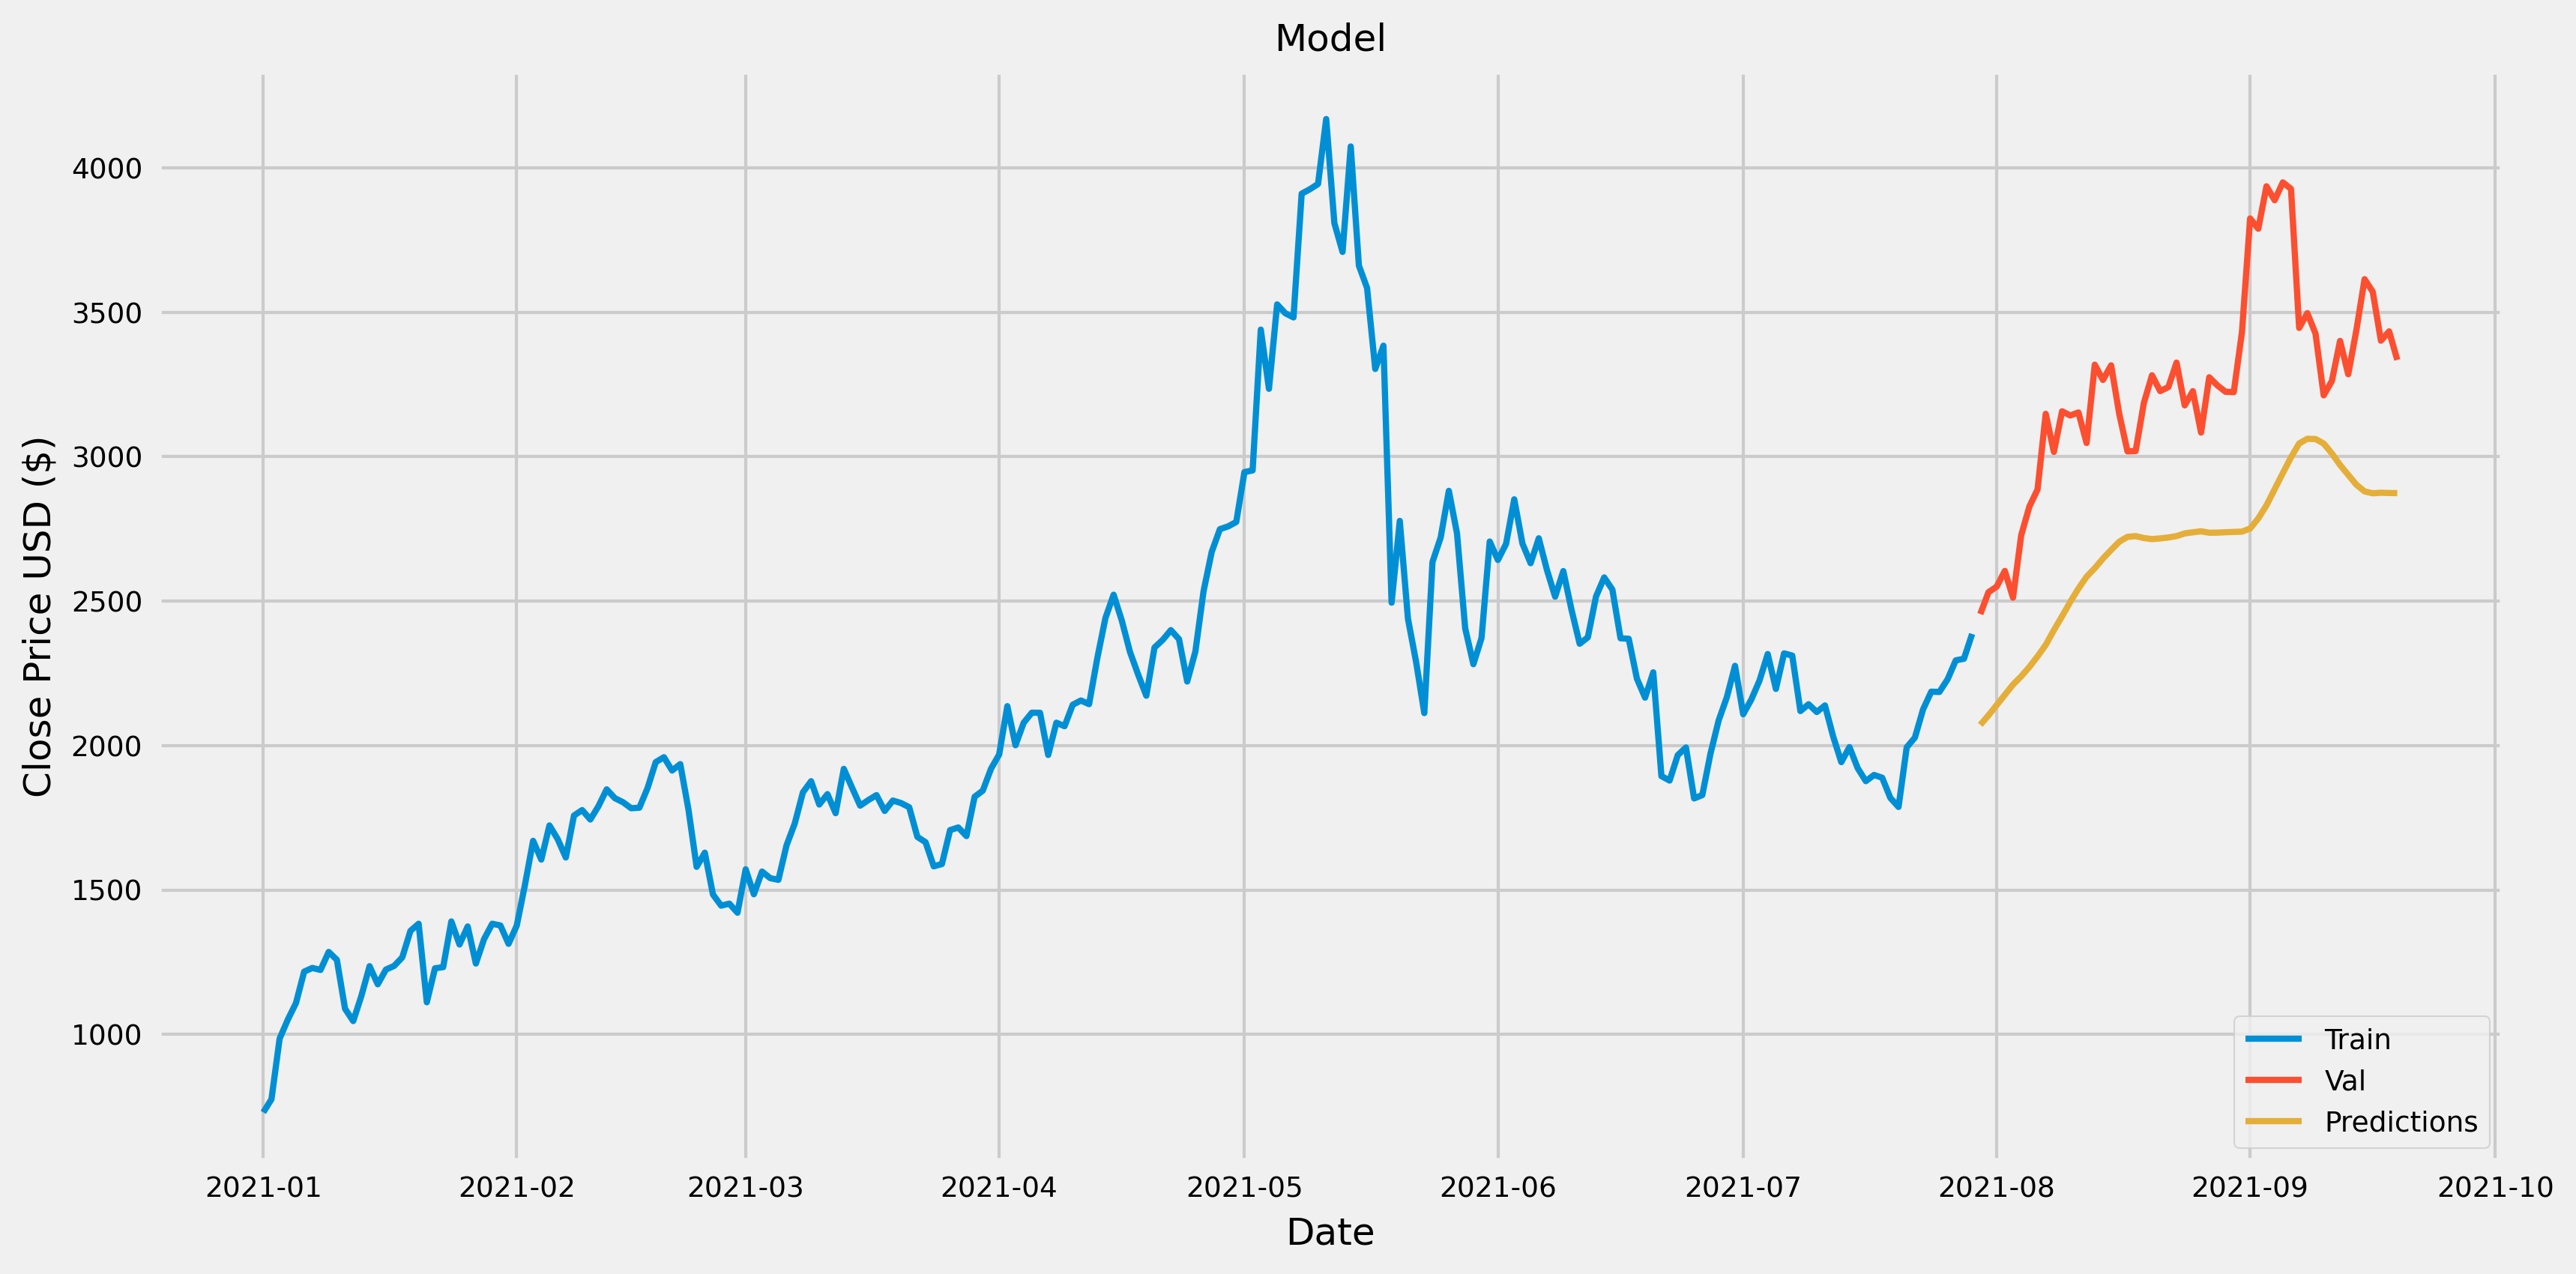

In [42]:
# Plot the data
train1 = data1[:training_data_len1]
valid1 = data1[training_data_len1:]
valid1['Predictions'] = predictions1

# Visualize the data
plt.figure(figsize=(12,6))
plt.title('Model', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.tick_params(labelsize=9, width=0.2, length=1)

plt.plot(train1['Close'], linewidth=2.0)
plt.plot(valid1[['Close', 'Predictions']], linewidth=2.0)
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right', fontsize=9)
plt.show()

**Price prediction for all assets**

In [43]:
temp = df_train.reset_index(drop = True) 
temp['TIME'] = pd.to_datetime(temp['timestamp'], unit='s')
start = dt.datetime.strptime('2021-01-01', '%Y-%m-%d')
end = dt.datetime.strptime('2021-09-20', '%Y-%m-%d')
train_data = temp.loc[temp["TIME"].between(start, end)]

In [44]:
# train test split df_train into 80% train rows and 20% valid rows

def get_Xy_and_model_for_asset(df_train, asset_id):
    df = df_train[df_train["Asset_ID"] == asset_id]
    df = df.filter(['Close'])
    df = df.values
    training_data_len = math.ceil(len(df) * .001)
    # Scale the Data
    scaler = MinMaxScaler(feature_range=(0,1))
    scaled_data = scaler.fit_transform(df)
    # Create the training data set
    # Create the scaled training data set
    train_data = scaled_data[0:training_data_len, :]

    # Split the data itno x_train and y_train data sets
    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])

    # Convert the x_train and y_train to numpy arrays
    x_train, y_train = np.array(x_train), np.array(y_train)
    # Reshape the data
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    # x_train.shape
    # Build the LSTM Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1) # LSTM model
    return x_train, y_train, model

Xs = {}
ys = {}
models = {}

for asset_id, asset_name in zip(df_asset_details['Asset_ID'], df_asset_details['Asset_Name']):
    print(f"Training model for {asset_name:<16} (ID={asset_id:<2})")
    X, y, model = get_Xy_and_model_for_asset(train_data, asset_id)       
    try:
        Xs[asset_id], ys[asset_id], models[asset_id] = X, y, model
    except: 
        Xs[asset_id], ys[asset_id], models[asset_id] = None, None, None

Training model for Bitcoin          (ID=1 )
318/318 [==============================] - 11s 25ms/step - loss: 2.2741e-05
Training model for Ethereum         (ID=6 )
318/318 [==============================] - 11s 25ms/step - loss: 4.1220e-06
Training model for Cardano          (ID=3 )
318/318 [==============================] - 11s 26ms/step - loss: 2.4582e-06
Training model for Binance Coin     (ID=0 )
318/318 [==============================] - 11s 25ms/step - loss: 3.0198e-06
Training model for Dogecoin         (ID=4 )
318/318 [==============================] - 10s 24ms/step - loss: 5.4040e-06
Training model for Bitcoin Cash     (ID=2 )
318/318 [==============================] - 11s 25ms/step - loss: 8.2960e-06
Training model for Litecoin         (ID=9 )
318/318 [==============================] - 11s 26ms/step - loss: 1.1304e-04
Training model for Ethereum Classic (ID=7 )
318/318 [==============================] - 10s 24ms/step - loss: 5.6675e-06
Training model for Stellar          (ID=

In [45]:
sup_train = pd.read_csv('../content/supplemental_train.csv', 
                 usecols=['Close', 'Target', 'Asset_ID','timestamp'], dtype={'Asset_ID': 'int8'})
sup_train['datetime'] = pd.to_datetime(sup_train['timestamp'], unit='s')
sup_train = sup_train.set_index('datetime').drop('timestamp', axis=1)
sup_train = sup_train[(sup_train.index.year == 2021) & (sup_train.index.month > 5)]
sup_trains = {asset_id: sup_train[sup_train['Asset_ID'] == asset_id].resample('1min').interpolate().copy() for asset_id in sup_train['Asset_ID'].unique()}
del sup_train

In [46]:
import gresearch_crypto
env = gresearch_crypto.make_env()
iter_test = env.iter_test()

In [47]:
df = pd.read_csv('../content/supplemental_train.csv', 
                 usecols=['Target', 'Asset_ID','timestamp'], dtype={'Asset_ID': 'int8'})
df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.set_index('datetime').drop('timestamp', axis=1)
df = df[(df.index.year == 2021) & (df.index.month > 5)]
dfs = {asset_id: df[df['Asset_ID'] == asset_id].resample('1min').interpolate().copy() for asset_id in df['Asset_ID'].unique()}
del df
for df_test, df_pred in iter_test:
    df_test['datetime'] = pd.to_datetime(df_test['timestamp'], unit='s')
    for _, row in df_test.iterrows():
        try:
            df = dfs[row['Asset_ID']]
            closest_train_sample = df.iloc[df.index.get_loc(row['datetime'], method='nearest')]
            df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = closest_train_sample['Target']
        except:
            df_pred.loc[df_pred['row_id'] == row['row_id'], 'Target'] = 0
    df_pred['Target'] = df_pred['Target'].fillna(0)
    env.predict(df_pred)

This version of the API is not optimized and should not be used to estimate the runtime of your code on the hidden test set.
